## Imports

In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sn
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from explore_hyperparameter import *
from plot_learning_curve import *
import time

import warnings
warnings.filterwarnings('ignore')


RANDOM_STATE = 4000 #to keep results consistent


## Load Data

In [2]:
data = pd.read_csv('letter-recognition.data')
X = data.values[:, 1:17]
y = data.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = RANDOM_STATE)



## NEW ANALYSIS

In [ ]:
param = ['rbf', 'linear', 'poly', 'sigmoid']
clf = [SVC(kernel=i, random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Kernel Function')

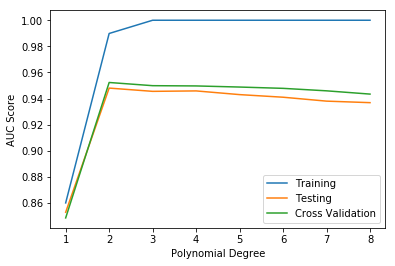

In [4]:
param = np.linspace(1, 8, 8, endpoint=True)
clf = [SVC(kernel='poly', degree = i, random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Polynomial Degree')

## Learning Curve

217.30775094032288


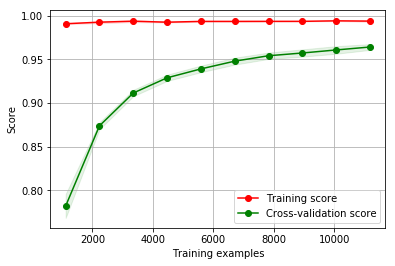

In [3]:
start = time.time()
clf = SVC(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
plot_learning_curve(clf, X_train, y_train, cv=5, train_sizes = np.linspace(0.1, 1, 10))
print(time.time() - start)